# SIRH model: including a healthcare population in the SIR model

### Model definition
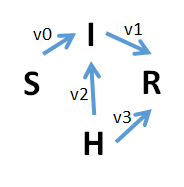

$v0=k[0]*S*I$ <br/>
$v1=k[1]*I$ <br/>
$v2=(1-k[2])*H*I$ <br/>
$v3=(k[3]*k[4])*H*I$ <br/>

- k[0] -> mixing rate of population
- k[1] -> infectious period
- k[2] -> PPE fraction available
- k[3] -> infectious period for healthcare workers
- k[4] -> Ventilator/other equipments fraction available

<br/>

$S'=-v1$ <br/>
$I'=v0+v2-v1-v3$ <br/>
$R'=v1+v3$ <br/>
$H'=-v2$ <br/><br/>

$N=S+I+R+H$ <br/><br/>

$S'+I'+R'+H'=0$ <br/><br/>


In [1]:
#importing modules
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from ipywidgets.widgets import interact, FloatSlider, Layout, IntSlider
%matplotlib inline

In [2]:
#Parameter explorer

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

#model definition
def plot_ode_solution(k0,k1,k2,k3,k4,ic0,ic1,ic2,tm):
    #model definition
    def modSIRH(y,t,N,k):
        #assignments
        S=N-sum(y[0:2])
        dy=[0]*3

        #reaction rates
        v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
        v1=k[1]*(y[0]/N) #k1*I
        v2=(1-k[2])*(y[0]/N)*(y[2]/N) #(1-PPE)*I*H
        v3=k[3]*k[4]*(y[0]/N)*(y[2]/N) #k3*Vent*I*H

        #ODEs
        dy[0]=N*(v0+v2-v1-v3) #I
        dy[1]=N*(v1+v3) #R
        dy[2]=N*(-v2) #H

        return dy

    #parameters
    ##default parameters
    k=[k0,k1,k2,k3,k4]
    N=1 #population count
    ##Initial conditions
    ic=[ic0,ic1,ic2]
    ##timeline
    tmax=tm #number of days
    tvec=np.arange(0,tmax,0.1)

    #solving equations
    soln=odeint(modSIRH,ic,tvec,args=(N,k))
    #plotting solution
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    #plt.plot(tvec,soln)
    plt.plot(tvec,[i[0] for i in soln])
    legend_labels = ("Infected","Recovered","Healthcare")
    plt.xlabel("Time (days)")
    plt.title("Healthcare pressure COVID")
    plt.ylabel("Number of Infected Cases")
    plt.legend(legend_labels)
    #plt.ylim([0,20])

##default parameters
interact(plot_ode_solution,
        k0=FloatSlider(min=0, max=1, step=0.01, value=0.3, description='Infection rate', style=style, layout=slider_layout),
        k1=FloatSlider(min=0, max=1, step=0.01, value=0.01, description='Recovery rate', style=style, layout=slider_layout),
        k2=FloatSlider(min=0, max=1, step=0.01, value=0.001, description='PPE fraction', style=style, layout=slider_layout),
        k3=FloatSlider(min=0, max=1, step=0.01, value=0.02, description='Infection rate for healthcare', style=style, layout=slider_layout),
        k4=FloatSlider(min=0, max=1, step=0.01, value=1, description='Ventilator fraction', style=style, layout=slider_layout),
        ic0=FloatSlider(min=0, max=1, step=0.01, value=0.16, description='#Infected', style=style, layout=slider_layout),
        ic1=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Recovered', style=style, layout=slider_layout),
        ic2=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Healthcare', style=style, layout=slider_layout),
        tm=IntSlider(min=0, max=3000, step=10, value=100, description='#days', style=style, layout=slider_layout))

interactive(children=(FloatSlider(value=0.3, description='Infection rate', layout=Layout(width='99%'), max=1.0…

<function __main__.plot_ode_solution(k0, k1, k2, k3, k4, ic0, ic1, ic2, tm)>

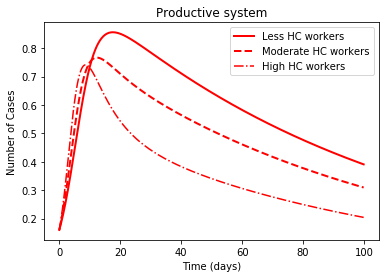

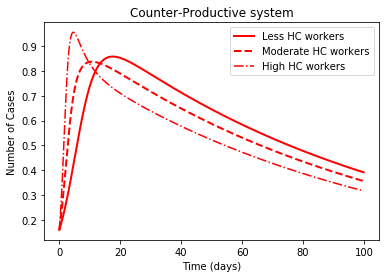

In [3]:
#counter productive system: higher health workers resulting in more patients

#model definition
def modSIRH(y,t,N,k):
    #assignments
    S=N-sum(y[0:2])
    dy=[0]*3

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
    v1=k[1]*(y[0]/N) #k1*I
    v2=(1-k[2])*(y[0]/N)*(y[2]/N) #(1-PPE)*I*H
    v3=k[3]*k[4]*(y[0]/N)*(y[2]/N) #k3*Vent*I*H

    #ODEs
    dy[0]=N*(v0+v2-v1-v3) #I
    dy[1]=N*(v1+v3) #R
    dy[2]=N*(-v2) #H

    return dy

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
#changed parameter
ind=2
k[ind]=0.7
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

##changed parameters
case=[0.01,0.4,0.9]
icNum=2 #index value
##variable plot
plotVar=0 #index ic value
lw=2
##productive system: higher health workers resulting in fewer patients
ic[icNum]=case[0]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

##counter-productive system: higher health workers resulting in higher patients
k[ind]=0.1 #infection rate for healthcare workers
##solving equations
ic[icNum]=case[0]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Counter-Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

### Explaining counter-productive system analytically
#### With increasing healthcare workers there are more infected cases

$I'=v0+v2-v1-v3$ <br/>
$I'=(k[0]*S*I)+((1-k[2])*H*I)-(k[1]*I)-(k[3]*k[4]*H*I)$ <br/>
$I'=I(k[0]*S-k[1]+(1-k[2]-k[3]*k[4])*H)$ <br/>
$I'∝(1-k[2]-k[3]*k[4])$ <br/>
$I'∝(1-PPE-H_{infection}*Ventilators)$ <br/><br/>

- Criteria for a productive outcome - fewer infected cases with more healthcare workers <br/>
$PPE+H_{infection}*Ventilators>1$ <br/>
meaning PPE and medical equipments (ventilators) should be adequately available <br/><br/>

- Criteria for a counter-productive outcome - more infected cases with more healthcare workers <br/>
$PPE+H_{infection}*Ventilators<1$ <br/>
meaning there will be a deficit of PPE and medical equipments (ventilators) <br/><br/>

In [4]:
#phase plots 2D

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

cpSys=[]
pSys=[]
plotParams=[2,4] #index values in k
plotRange=np.arange(0.0001,1.0,0.01)
for m in plotRange:
    #print(m)
    k[plotParams[0]]=m
    for n in plotRange:
        k[plotParams[1]]=n
        ic[2]=0.01
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax1=max([i[0] for i in soln])
        ic[2]=0.9
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax2=max([i[0] for i in soln])
        if Imax1>Imax2:
            pSys.append([m,n])
        if Imax1<Imax2:
            cpSys.append([m,n])            
print(len(pSys),len(cpSys))

7921 2079


C:\Users\tvarusai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


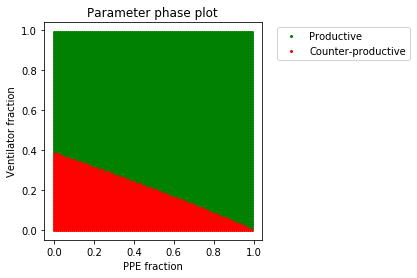

In [5]:
#phase plot
ms=2
plt.plot([i[0] for i in pSys],[i[1] for i in pSys],'go',markersize=ms)
plt.plot([i[0] for i in cpSys],[i[1] for i in cpSys],'ro',markersize=ms)
legend_labels = ("Productive","Counter-productive")
plt.xlabel("PPE fraction")
plt.title("Parameter phase plot")
plt.ylabel("Ventilator fraction")
plt.legend(legend_labels,bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.axes().set_aspect('equal')
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

In [6]:
#phase plots

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

def IMaxCalculator(varInd,parInd,parValue,plotRange=np.arange(0.0001,1,0.01)):
    ImaxSet=[]
    k[parInd]=parValue
    for m in plotRange:
        ic[varInd]=m
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax=max([i[0] for i in soln])
        ImaxSet.append([m,Imax])
    return ImaxSet

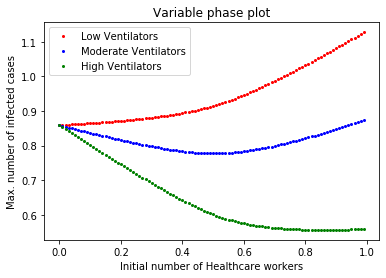

In [7]:
ms=2

ImaxSet=IMaxCalculator(2,4,0.01)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low Ventilators')

ImaxSet=IMaxCalculator(2,4,0.4)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate Ventilators')

ImaxSet=IMaxCalculator(2,4,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High Ventilators')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

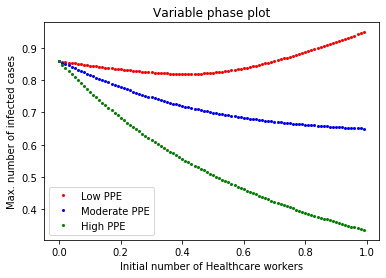

In [8]:
k[3]= 0.3 #recovery rate with treatment
k[4]=0.6 #Ventilator fraction

ms=2

ImaxSet=IMaxCalculator(2,2,0.1)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low PPE')

ImaxSet=IMaxCalculator(2,2,0.7)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate PPE')

ImaxSet=IMaxCalculator(2,2,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High PPE')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()